AQI PREDICTION MODEL USING PYTHON

*   PM2.5,PM10
*   NO,NO2
*   NH3-Ammonia
*   CO
*   SO2
*   O3
*   Benzene,Toluene,Xylene

In [1]:
#pip install numpy pandas matplotlib seaborn scikit-learn

In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings ('ignore')

In [3]:
from google.colab import files
uploaded = files.upload()


Saving air quality data.csv to air quality data.csv


In [4]:
import os
print(os.listdir('/content'))  # Lists all files in the Colab working directory

['.config', 'air quality data.csv', 'sample_data']


In [5]:
df = pd.read_csv('/content/air quality data.csv')
df.head() #Top 5 rows!

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [6]:
#Shape-rows and cols!
df.shape

(29531, 16)

In [7]:
#Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [8]:
#To know duplicate values
df.duplicated().sum()

0

In [9]:
#To check missing values
df.isnull().sum()

,0
City,0
Date,0
PM2.5,4598
PM10,11140
NO,3582
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854


In [10]:
#Drop the rows where 'AQI' has missing values
df.dropna(subset=['AQI'], inplace= True)

In [11]:
df.isnull().sum().sort_values(ascending=False)

,0
Xylene,15372
PM10,7086
NH3,6536
Toluene,5826
Benzene,3535
NOx,1857
O3,807
PM2.5,678
SO2,605
CO,445


In [12]:
df.shape

(24850, 16)

In [13]:
#Summary of statistics in the dataset
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24172.000000,17764.000000,24463.000000,24459.000000,22993.000000,18314.000000,24405.000000,24245.000000,24043.000000,21315.000000,19024.000000,9478.000000,24850.000000
mean,67.476613,118.454435,17.622421,28.978391,32.289012,23.848366,2.345267,14.362933,34.912885,3.458668,9.525714,3.588683,166.463581
std,63.075398,89.487976,22.421138,24.627054,30.712855,25.875981,7.075208,17.428693,21.724525,16.036020,20.881085,6.754324,140.696585
min,0.040000,0.030000,0.030000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,29.000000,56.777500,5.660000,11.940000,13.110000,8.960000,0.590000,5.730000,19.250000,0.230000,1.027500,0.390000,81.000000
50%,48.785000,96.180000,9.910000,22.100000,23.680000,16.310000,0.930000,9.220000,31.250000,1.290000,3.575000,1.420000,118.000000
75%,80.925000,150.182500,20.030000,38.240000,40.170000,30.360000,1.480000,15.140000,46.080000,3.340000,10.180000,4.120000,208.000000
max,914.940000,917.080000,390.680000,362.210000,378.240000,352.890000,175.810000,186.080000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [14]:
#Percentage of th null values
null_values_percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
null_values_percentage


,0
Xylene,61.859155
PM10,28.515091
NH3,26.301811
Toluene,23.444668
Benzene,14.225352
NOx,7.472837
O3,3.247485
PM2.5,2.728370
SO2,2.434608
CO,1.790744


# **KEY CONSIDERATIONS**
* Xylene has the higher percentage of missing values - 61.66%
* PM10 ans NH3 28-26%

In [15]:
from IPython.display import clear_output
clear_output()


WEEK 2- VISUALIZATION

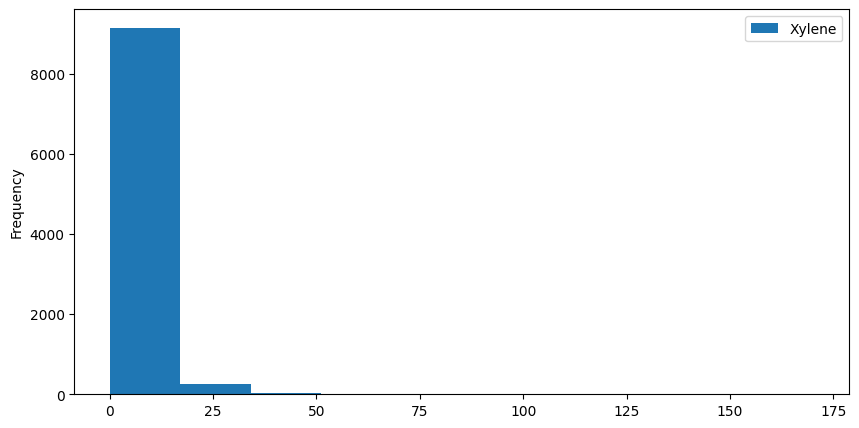

In [16]:
#Univariate analysis
df['Xylene'].plot(kind = 'hist' , figsize=(10,5))
plt.legend()
plt.show()

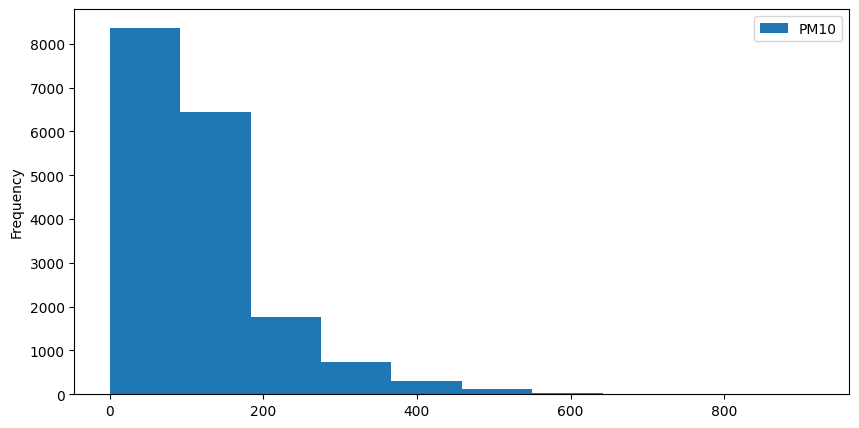

In [17]:
df['PM10'].plot(kind = 'hist' , figsize=(10,5))
plt.legend()
plt.show()

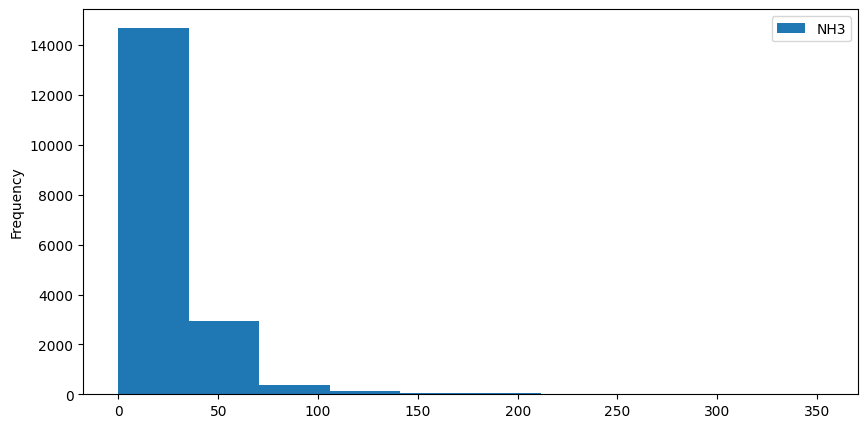

In [18]:
df['NH3'].plot(kind = 'hist' , figsize=(10,5))
plt.legend()
plt.show()

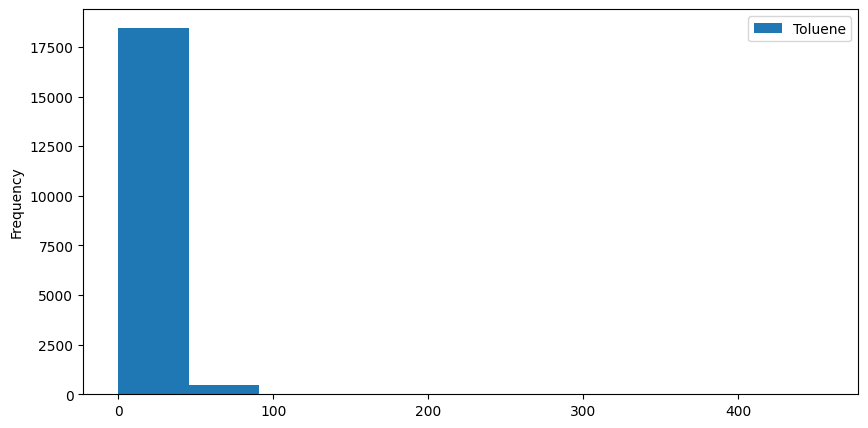

In [19]:
df['Toluene'].plot(kind = 'hist' , figsize=(10,5))
plt.legend()
plt.show()

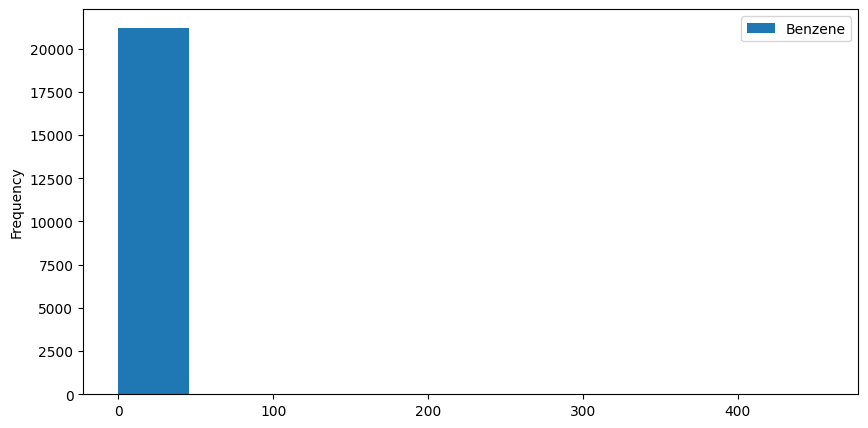

In [20]:
df['Benzene'].plot(kind = 'hist' , figsize=(10,5))
plt.legend()
plt.show()

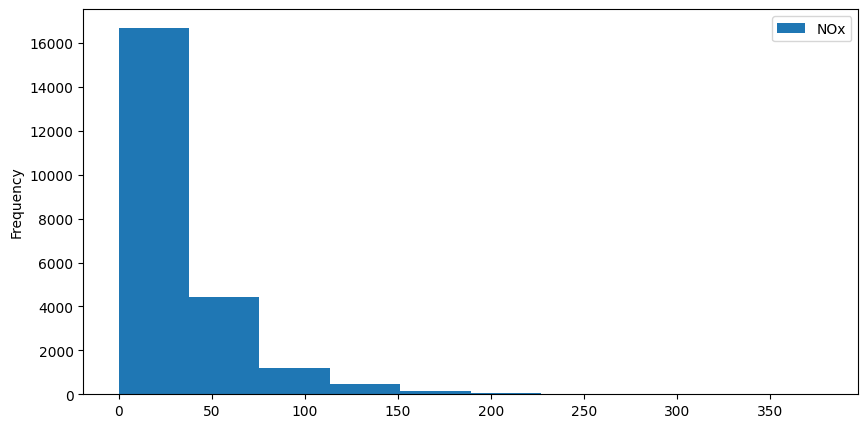

In [21]:
df['NOx'].plot(kind = 'hist' , figsize=(10,5))
plt.legend()
plt.show()

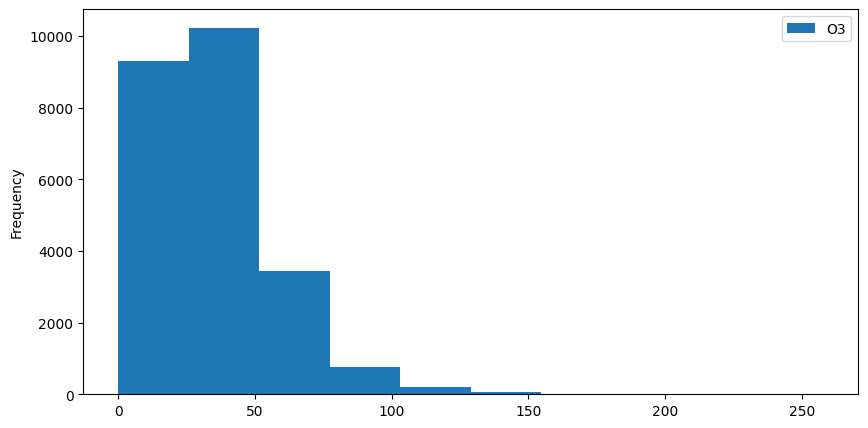

In [22]:
df['O3'].plot(kind = 'hist' , figsize=(10,5))
plt.legend()
plt.show()

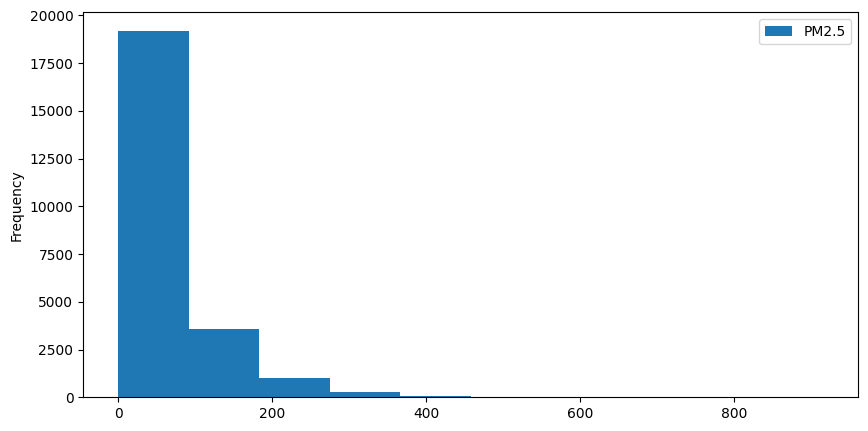

In [23]:
df['PM2.5'].plot(kind = 'hist' , figsize=(10,5))
plt.legend()
plt.show()

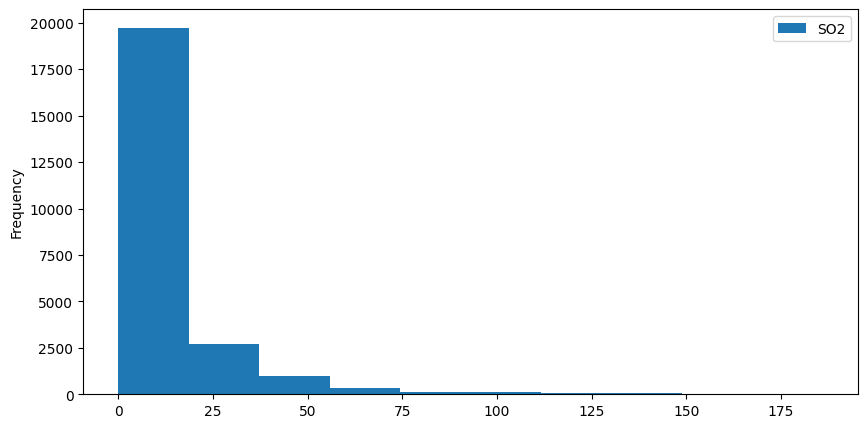

In [24]:
df['SO2'].plot(kind = 'hist' , figsize=(10,5))
plt.legend()
plt.show()

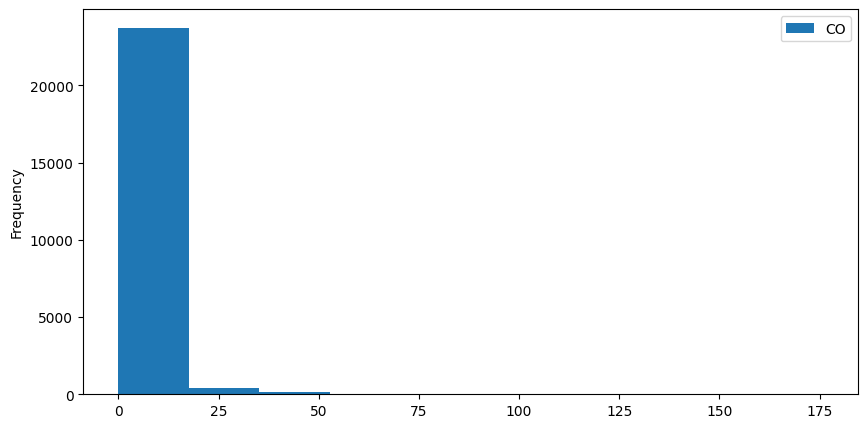

In [25]:
df['CO'].plot(kind = 'hist' , figsize=(10,5))
plt.legend()
plt.show()

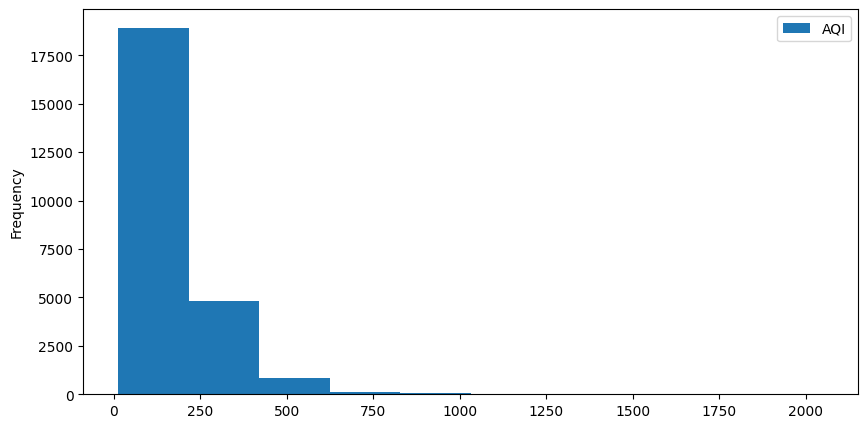

In [26]:
df['AQI'].plot(kind = 'hist' , figsize=(10,5))
plt.legend()
plt.show()

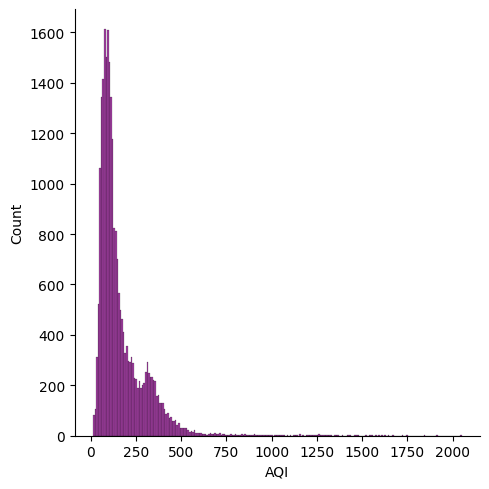

In [28]:
#Distribution of AQi from 2015 to 2020
sns.displot(df, x= 'AQI', color='purple')
plt.show()

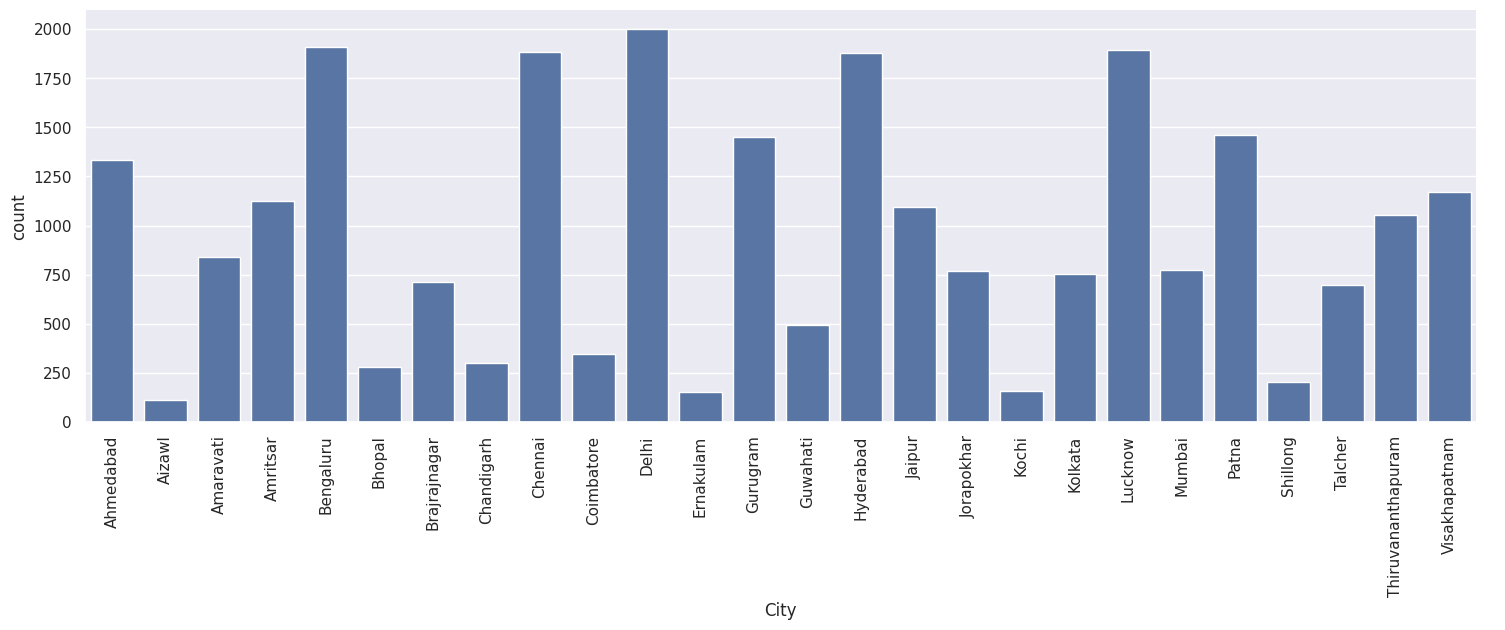

In [29]:
#Bivariate
sns.set_theme(style='darkgrid')
graph = sns.catplot(x="City", kind="count", data=df, height=5, aspect=3)
graph.set_xticklabels(rotation=90)

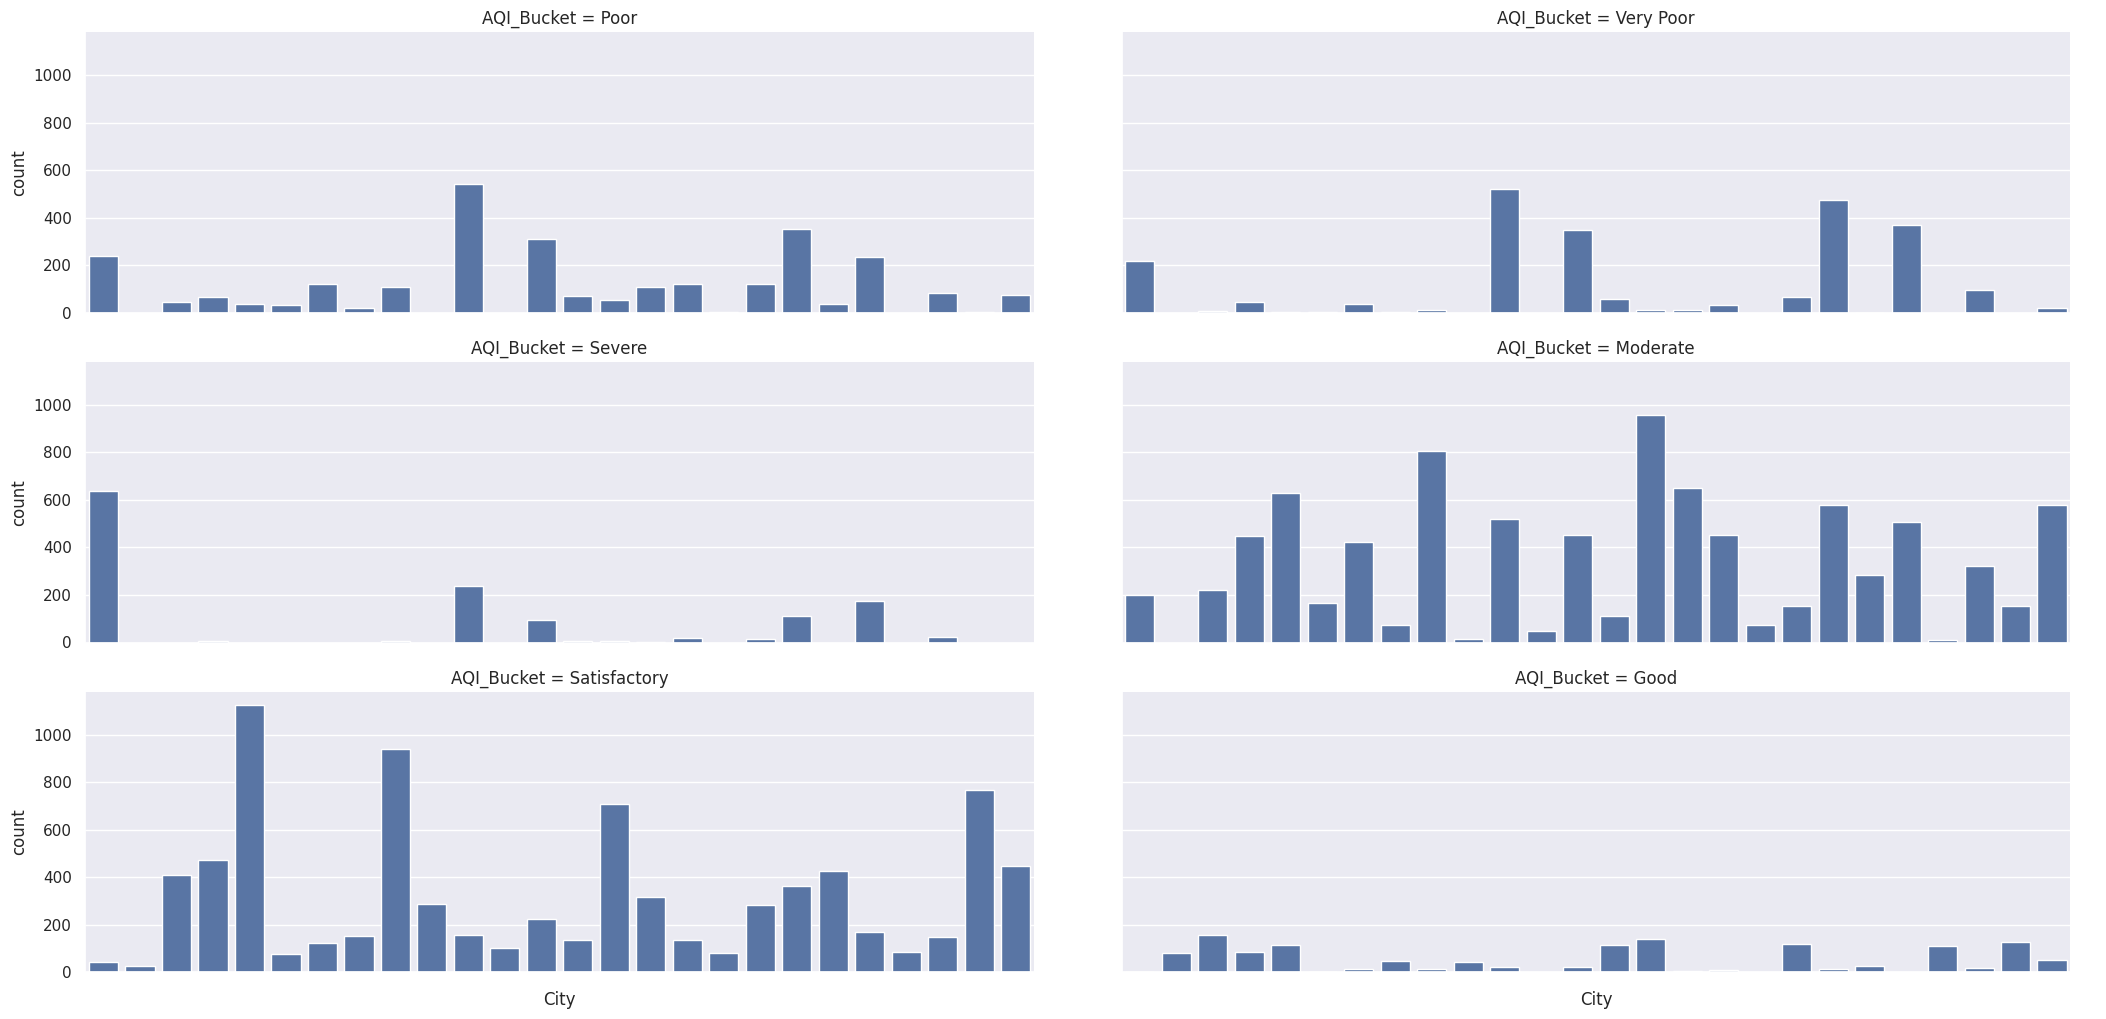

In [30]:
sns.set_theme(style='darkgrid')
graph = sns.catplot(x="City", kind="count", data=df, col="AQI_Bucket", col_wrap=2, height=3.5, aspect=3)
graph.set_xticklabels(rotation=90)

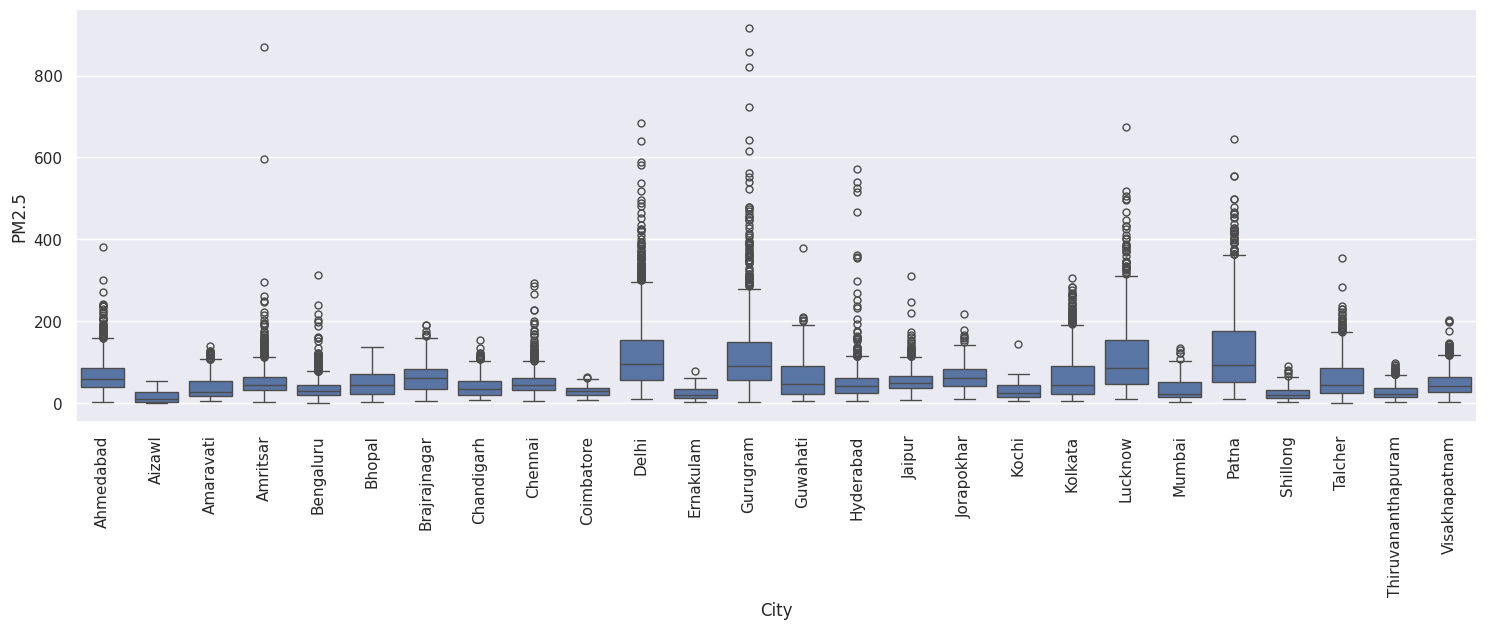

In [32]:
graph1=sns.catplot(x="City", y='PM2.5', kind='box', data=df, height=5, aspect=3)
graph1.set_xticklabels(rotation=90)

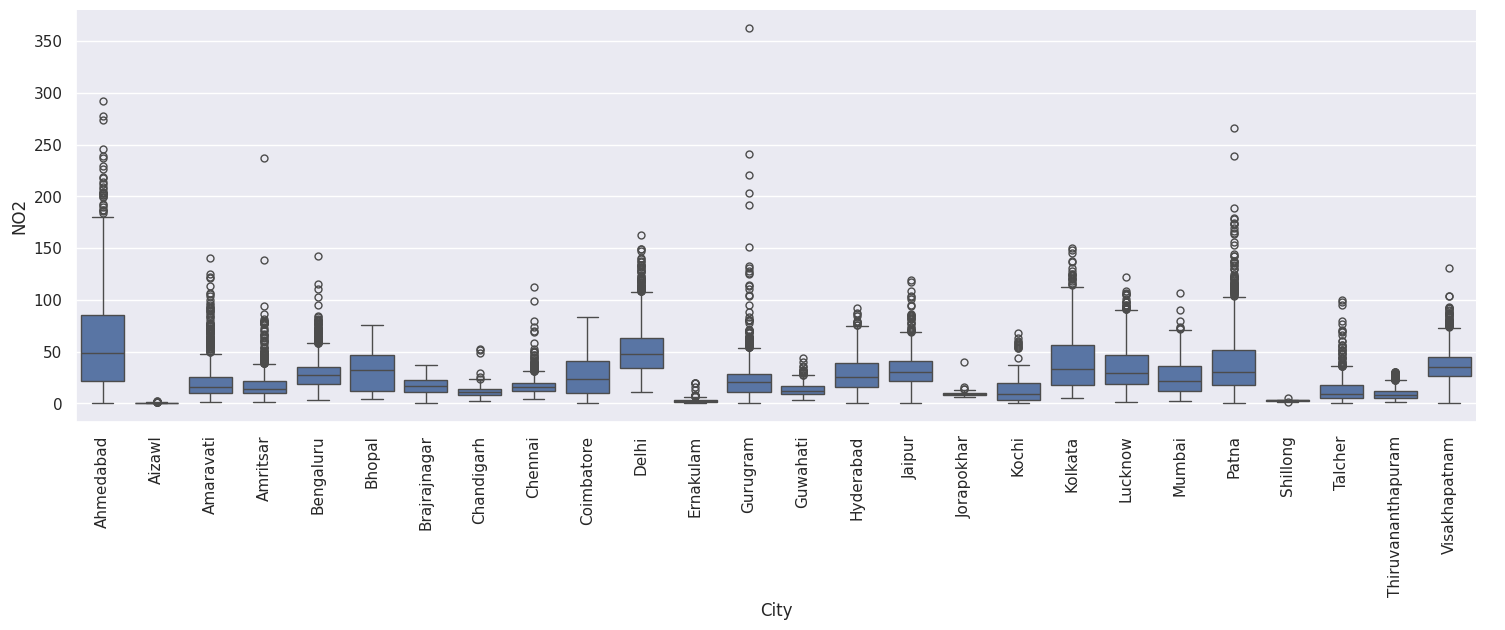

In [36]:
graph2=sns.catplot(x="City", y='NO2', kind='box', data=df, height=5, aspect=3)
graph2.set_xticklabels(rotation=90)

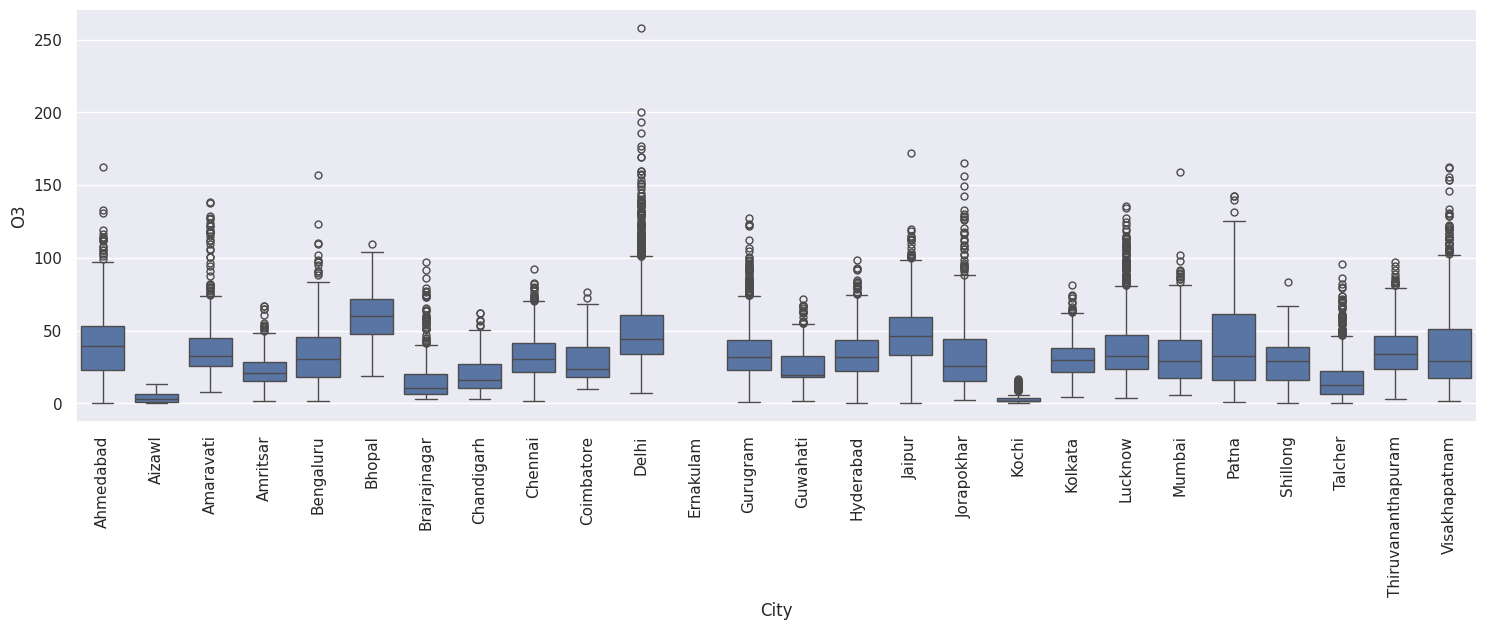

In [37]:
graph3=sns.catplot(x="City", y='O3', kind='box', data=df, height=5, aspect=3)
graph3.set_xticklabels(rotation=90)

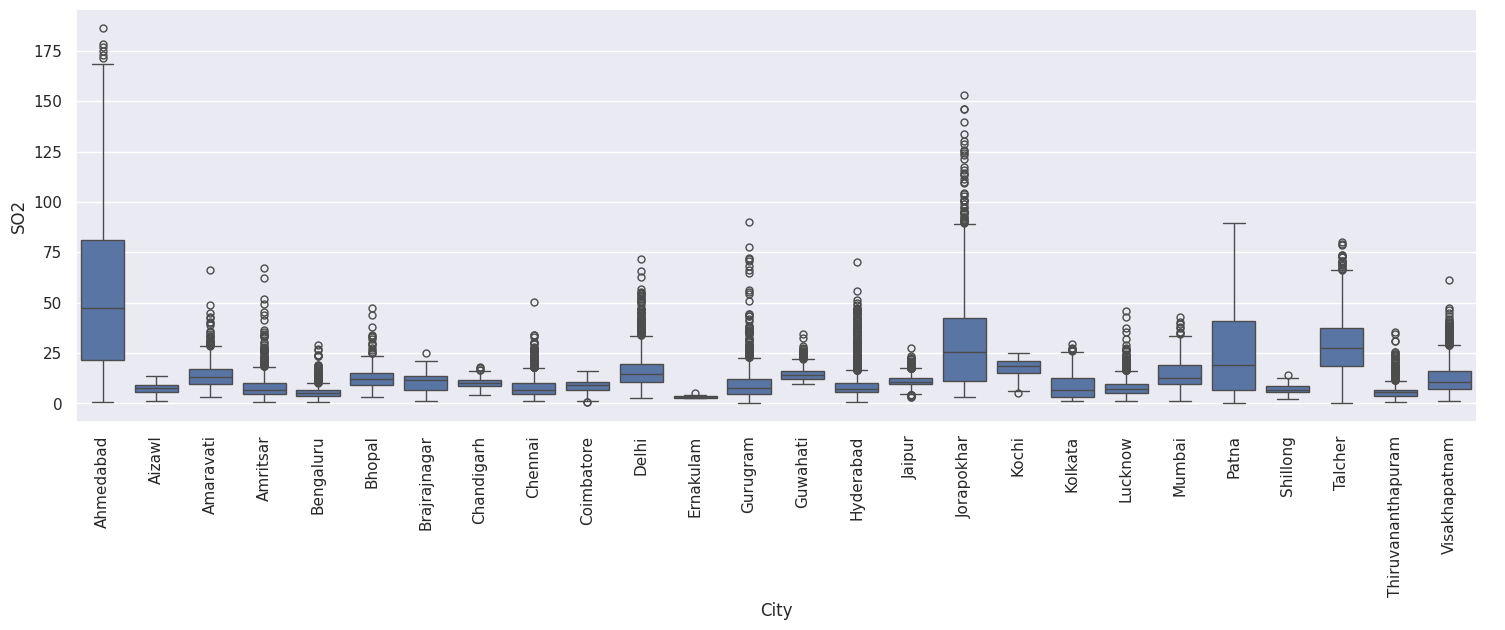

In [38]:
graph4=sns.catplot(x="City", y='SO2', kind='box', data=df, height=5, aspect=3)
graph4.set_xticklabels(rotation=90)

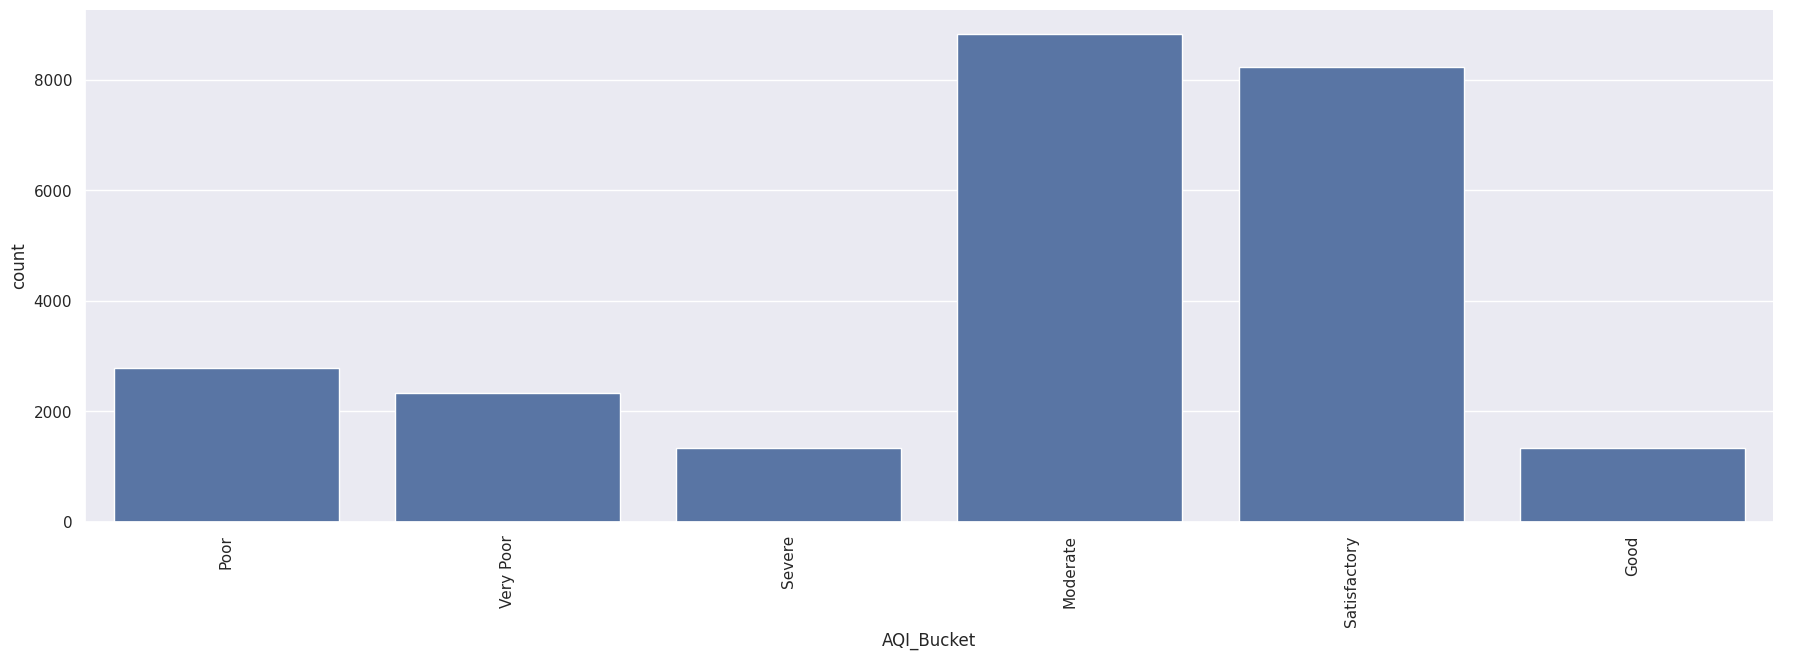

In [40]:
graph5=sns.catplot(x='AQI_Bucket', kind='count', data=df, height=6, aspect=3)
graph5.set_xticklabels(rotation=90)

In [41]:
#TO check the null values
df.isnull().sum().sort_values(ascending=False)

,0
Xylene,15372
PM10,7086
NH3,6536
Toluene,5826
Benzene,3535
NOx,1857
O3,807
PM2.5,678
SO2,605
CO,445


In [42]:
df.describe().loc['mean']

,mean
PM2.5,67.476613
PM10,118.454435
NO,17.622421
NO2,28.978391
NOx,32.289012
NH3,23.848366
CO,2.345267
SO2,14.362933
O3,34.912885
Benzene,3.458668


In [48]:
df = df.replace({
    "PM2.5":{np.nan:67.476613},
    "PM10":{np.nan:118.454435},
    "NO":{np.nan:17.622421},
    "NO2":{np.nan:28.978391},
    "NOx":{np.nan:32.289012},
    "NH3":{np.nan:23.848366},
    "CO":{np.nan:2.345267},
    "SO2":{np.nan:14.362933},
    "O3":{np.nan:34.912885},
    "Benzene":{np.nan:3.458668},
})

In [49]:
df.isnull().sum()

,0
City,0
Date,0
PM2.5,0
PM10,0
NO,0
NO2,0
NOx,0
NH3,0
CO,0
SO2,0


In [50]:
df = df.drop(['AQI_Bucket'], axis=1)

In [51]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
28,Ahmedabad,2015-01-29,83.13,118.454435,6.93,28.71,33.72,23.848366,6.93,49.52,59.76,0.02,0.00,3.14,209.0
29,Ahmedabad,2015-01-30,79.84,118.454435,13.85,28.68,41.08,23.848366,13.85,48.49,97.07,0.04,0.00,4.81,328.0
30,Ahmedabad,2015-01-31,94.52,118.454435,24.39,32.66,52.61,23.848366,24.39,67.39,111.33,0.24,0.01,7.67,514.0
31,Ahmedabad,2015-02-01,135.99,118.454435,43.48,42.08,84.57,23.848366,43.48,75.23,102.70,0.40,0.04,25.87,782.0
32,Ahmedabad,2015-02-02,178.33,118.454435,54.56,35.31,72.80,23.848366,54.56,55.04,107.38,0.46,0.06,35.61,914.0


<Axes: >

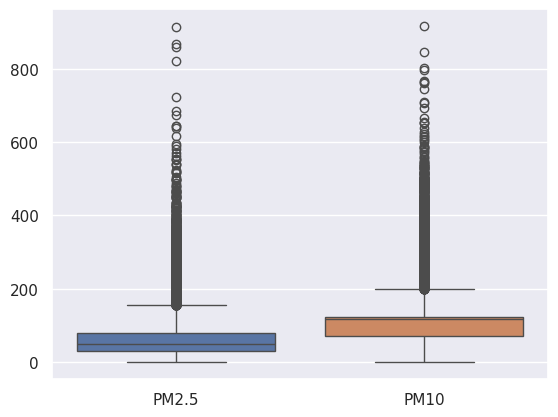

In [52]:
sns.boxplot(data=df[['PM2.5', 'PM10']])

<Axes: >

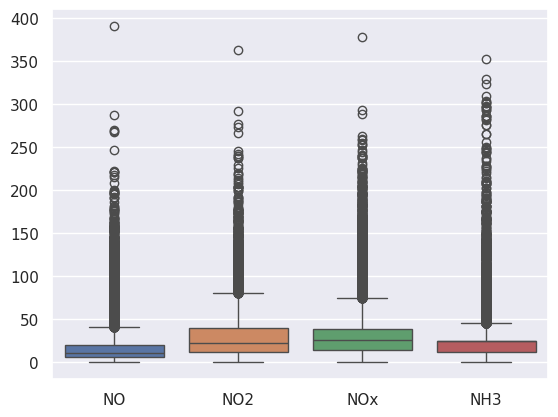

In [53]:
sns.boxplot(data=df[['NO', 'NO2', 'NOx', 'NH3']])

<Axes: >

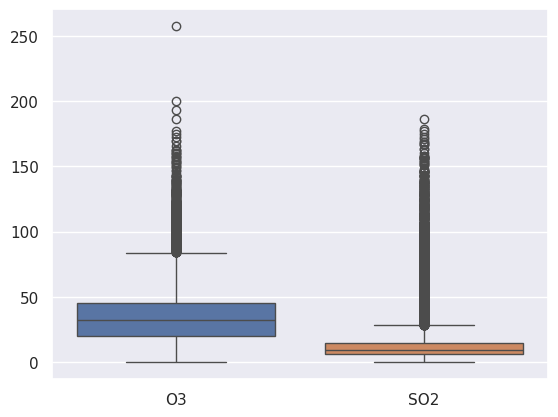

In [54]:
sns.boxplot(data=df[['O3', 'SO2']])

In [67]:
# IQR Method - Q3 Q1
def replace_outliers(df):
    for column in df.select_dtypes(include=['number']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lb= Q1 - 1.5 * IQR
        ub= Q3 + 1.5 * IQR
        df[column] = df[column].apply(
            lambda x: Q1 if x < lb else (Q3 if x > ub else x)
        )
    return df

In [68]:
df = replace_outliers(df)

In [69]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,19024.000000,9478.000000,24850.000000
mean,55.174281,101.351323,12.507694,26.850910,26.574513,19.486584,1.040507,10.334743,33.177781,2.098520,5.495570,2.259553,146.932032
std,31.829575,39.079916,8.762015,18.000600,16.138682,9.630370,0.615436,5.680901,17.487724,1.828135,5.446783,2.287116,87.421731
min,0.040000,0.030000,0.030000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,29.560000,71.780000,5.720000,12.090000,14.030000,11.280000,0.590000,5.790000,19.640000,0.340000,1.027500,0.390000,81.000000
50%,50.165000,118.454435,10.075000,22.535000,25.720000,23.848366,0.950000,9.430000,32.060000,1.810000,3.575000,1.420000,118.000000
75%,79.505625,122.955625,19.710000,39.335625,38.170000,24.710000,1.530000,14.890000,45.395625,3.458668,10.180000,4.120000,208.000000
max,154.300000,199.700000,40.680000,80.180000,74.380000,44.850000,2.940000,28.520000,83.990000,8.130000,23.900000,9.710000,398.000000


<Axes: >

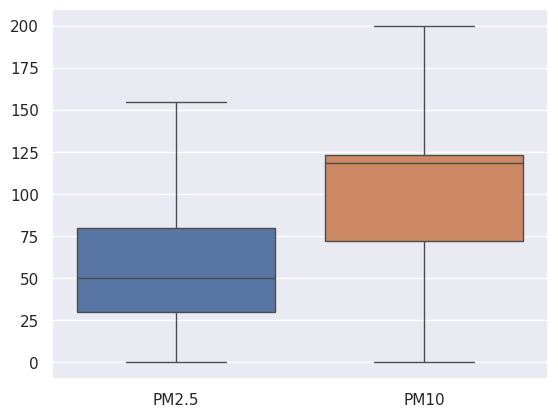

In [70]:
sns.boxplot(data=df[['PM2.5', 'PM10']])

<Axes: >

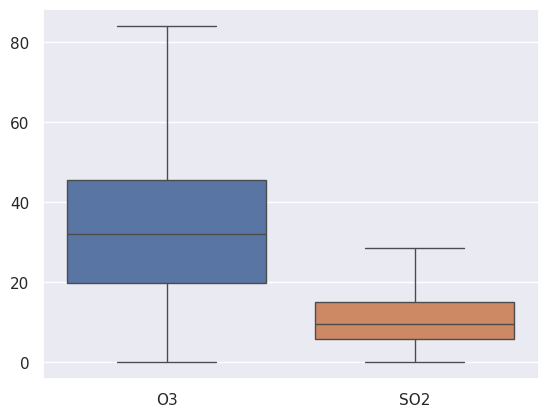

In [71]:
sns.boxplot(data=df[['O3', 'SO2']])

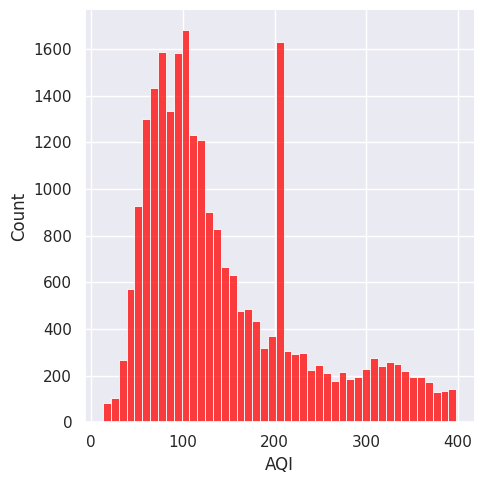

In [73]:
sns.displot(df, x='AQI', color='red')
plt.show()

In [74]:
df1 = df.drop(columns=['City'])

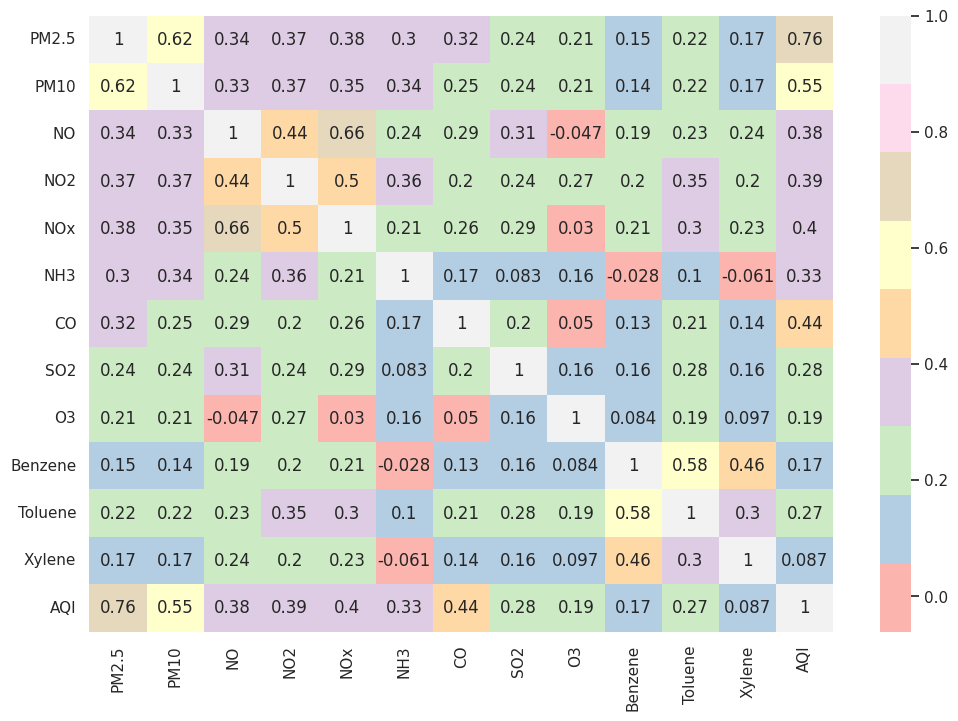

In [82]:
#MULTIVRIATE Analysis - Heatmap
import seaborn as sns
import matplotlib.pyplot as plt
df_numeric = df1.select_dtypes(include=['number'])
plt.figure(figsize=(12,8))
sns.heatmap(df_numeric.corr(),annot=True, cmap="Pastel1")
plt.show()

WEEK 3 DATA MODELING- 10 MARCH 2025

In [83]:
df.drop(['Date', 'City'], axis = 1, inplace = True)
df.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
28,83.1300,118.454435,6.93,28.71,33.72,23.848366,1.53,14.89,59.7600,0.02,0.00,3.14,209.0
29,79.8400,118.454435,13.85,28.68,41.08,23.848366,1.53,14.89,45.3975,0.04,0.00,4.81,328.0
30,94.5200,118.454435,24.39,32.66,52.61,23.848366,1.53,14.89,45.3975,0.24,0.01,7.67,208.0
31,135.9900,118.454435,19.71,42.08,38.17,23.848366,1.53,14.89,45.3975,0.40,0.04,4.12,208.0
32,79.5075,118.454435,19.71,35.31,72.80,23.848366,1.53,14.89,45.3975,0.46,0.06,4.12,208.0


In [85]:
#Scaling - Standard Scaler
from sklearn.preprocessing import StandardScaler
df1 = StandardScaler().fit_transform(df)
df1

array([[ 0.87831149,  0.43765334, -0.63658947, ..., -1.00898364,
         0.38497998,  0.70999757],
       [ 0.77494642,  0.43765334,  0.15319907, ..., -1.00898364,
         1.11519577,  2.07124258],
       [ 1.23616198,  0.43765334,  1.35614288, ..., -1.00714765,
         2.36574497,  0.69855854],
       ...,
       [-1.01367767, -0.91151782, -1.03376636, ..., -1.00714765,
        -0.98800061, -0.90290618],
       [-1.21066824, -1.31480214, -0.96528759, ..., -1.00898364,
        -0.98800061, -1.06305265],
       [-1.26219369, -0.90460877, -1.3818668 , ...,         nan,
                nan, -1.10880878]])

In [87]:
df = pd.DataFrame(df1, columns=df.columns)
df.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,0.878311,0.437653,-0.636589,0.103281,0.442764,0.452929,0.795376,0.801871,1.520081,-1.136985,-1.008984,0.384980,0.709998
1,0.774946,0.437653,0.153199,0.101615,0.898821,0.452929,0.795376,0.801871,0.698774,-1.126045,-1.008984,1.115196,2.071243
2,1.236162,0.437653,1.356143,0.322723,1.613267,0.452929,0.795376,0.801871,0.698774,-1.016642,-1.007148,2.365745,0.698559
3,2.539065,0.437653,0.822008,0.846049,0.718505,0.452929,0.795376,0.801871,0.698774,-0.929119,-1.001640,0.813490,0.698559
4,0.764500,0.437653,0.822008,0.469943,2.864324,0.452929,0.795376,0.801871,0.698774,-0.896298,-0.997968,0.813490,0.698559


In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [89]:
df.columns

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI'],
      dtype='object')

In [96]:
#Feature and Target selection
X = df[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene']]
y = df['AQI']

In [97]:
X.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
0,0.878311,0.437653,-0.636589,0.103281,0.442764,0.452929,0.795376,0.801871,1.520081,-1.136985,-1.008984,0.384980
1,0.774946,0.437653,0.153199,0.101615,0.898821,0.452929,0.795376,0.801871,0.698774,-1.126045,-1.008984,1.115196
2,1.236162,0.437653,1.356143,0.322723,1.613267,0.452929,0.795376,0.801871,0.698774,-1.016642,-1.007148,2.365745
3,2.539065,0.437653,0.822008,0.846049,0.718505,0.452929,0.795376,0.801871,0.698774,-0.929119,-1.001640,0.813490
4,0.764500,0.437653,0.822008,0.469943,2.864324,0.452929,0.795376,0.801871,0.698774,-0.896298,-0.997968,0.813490


In [100]:
#Split the data into training and testing data - training set- 80% | Testing set- 20%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Shape of X Train', X_train.shape)
print('Shape of X Test', X_test.shape)
print('Shape of y Train', y_train.shape)
print('Shape of y Test', y_test.shape)

Shape of X Train (19880, 12)
Shape of X Test (4970, 12)
Shape of y Train (19880,)
Shape of y Test (4970,)


In [102]:
#Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)

# Train the model
LR = LinearRegression()
LR.fit(X_train, y_train)


LinearRegression()

In [105]:
#Predicting the vales
from sklearn.impute import SimpleImputer

# Assuming you've already fitted the imputer on X_train
X_test = imputer.transform(X_test)  # Apply the same imputer to X_test

# Predict using the trained model
train_pred = LR.predict(X_train)
test_pred = LR.predict(X_test)


In [106]:
#Evaluating for Linear Regression
RMSE_train = np.sqrt(mean_squared_error(y_train, train_pred))
RMSE_test = np.sqrt(mean_squared_error(y_test, test_pred))
print('RMSE Train Data= ', str(RMSE_train))
print('RMSE Test Data= ', str(RMSE_test))
print('_'* 60)
print('R Squared value for Train= ', LR.score(X_train, y_train))
print('R Squared value for Test= ', LR.score(X_test, y_test))

RMSE Train Data=  0.5912528764934413
RMSE Test Data=  0.5822444732926583
____________________________________________________________
R Squared value for Train=  0.6516749605520866
R Squared value for Test=  0.6560057957666808


In [107]:
#KNN
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [109]:
#predicting the values
train_pred = knn.predict(X_train)
test_pred = knn.predict(X_test)
#Evaluation for linear regression
RMSE_train = np.sqrt(mean_squared_error(y_train, train_pred))
RMSE_test = np.sqrt(mean_squared_error(y_test, test_pred))
print('RMSE Train Data= ', str(RMSE_train))
print('RMSE Test Data= ', str(RMSE_test))
print('_'* 60)
print('R Squared value for Train= ', knn.score(X_train, y_train))
print('R Squared value for Test= ', knn.score(X_test, y_test))

RMSE Train Data=  0.39040489328421285
RMSE Test Data=  0.47888509039489396
____________________________________________________________
R Squared value for Train=  0.8481311632158764
R Squared value for Test=  0.7672964506062312


In [110]:
#Decision Tree
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [111]:
#predicting the values
train_pred = dtr.predict(X_train)
test_pred = dtr.predict(X_test)
#Evaluation for linear regression
RMSE_train = np.sqrt(mean_squared_error(y_train, train_pred))
RMSE_test = np.sqrt(mean_squared_error(y_test, test_pred))
print('RMSE Train Data= ', str(RMSE_train))
print('RMSE Test Data= ', str(RMSE_test))
print('_'* 60)
print('R Squared value for Train= ', dtr.score(X_train, y_train))
print('R Squared value for Test= ', dtr.score(X_test, y_test))

RMSE Train Data=  0.02594854601836432
RMSE Test Data=  0.5477716083998675
____________________________________________________________
R Squared value for Train=  0.9993290900734868
R Squared value for Test=  0.6955335715236379


In [112]:
#Random Forest regressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [113]:
#predicting the values
train_pred = rfr.predict(X_train)
test_pred = rfr.predict(X_test)
#Evaluation for linear regression
RMSE_train = np.sqrt(mean_squared_error(y_train, train_pred))
RMSE_test = np.sqrt(mean_squared_error(y_test, test_pred))
print('RMSE Train Data= ', str(RMSE_train))
print('RMSE Test Data= ', str(RMSE_test))
print('_'* 60)
print('R Squared value for Train= ', rfr.score(X_train, y_train))
print('R Squared value for Test= ', rfr.score(X_test, y_test))

RMSE Train Data=  0.14814397691384096
RMSE Test Data=  0.39180304918166803
____________________________________________________________
R Squared value for Train=  0.9781321462929821
R Squared value for Test=  0.8442328052034948
